In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib

from matplotlib import pyplot as plt
import numpy as np

# find local camb installation
_camb_path = os.path.join(os.path.abspath('.'), 'CAMB')
sys.path.insert(0, _camb_path)

import camb

print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.4 installed at /mnt/c/Users/dambr/Desktop/AstroCosmoComputational/Students/Anna_DAmbrosio/LessonCAMB/CAMB/camb


In [2]:
# set parameters
pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, As=2e-9, ns=0.965)
pars2 = camb.set_params(H0=67.5, ombh2=1.1*0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.2, As=2e-9, ns=0.965)

In [3]:
#calculate results for these parameters
results = camb.get_results(pars)
results2 = camb.get_results(pars2)

## Background cosmology

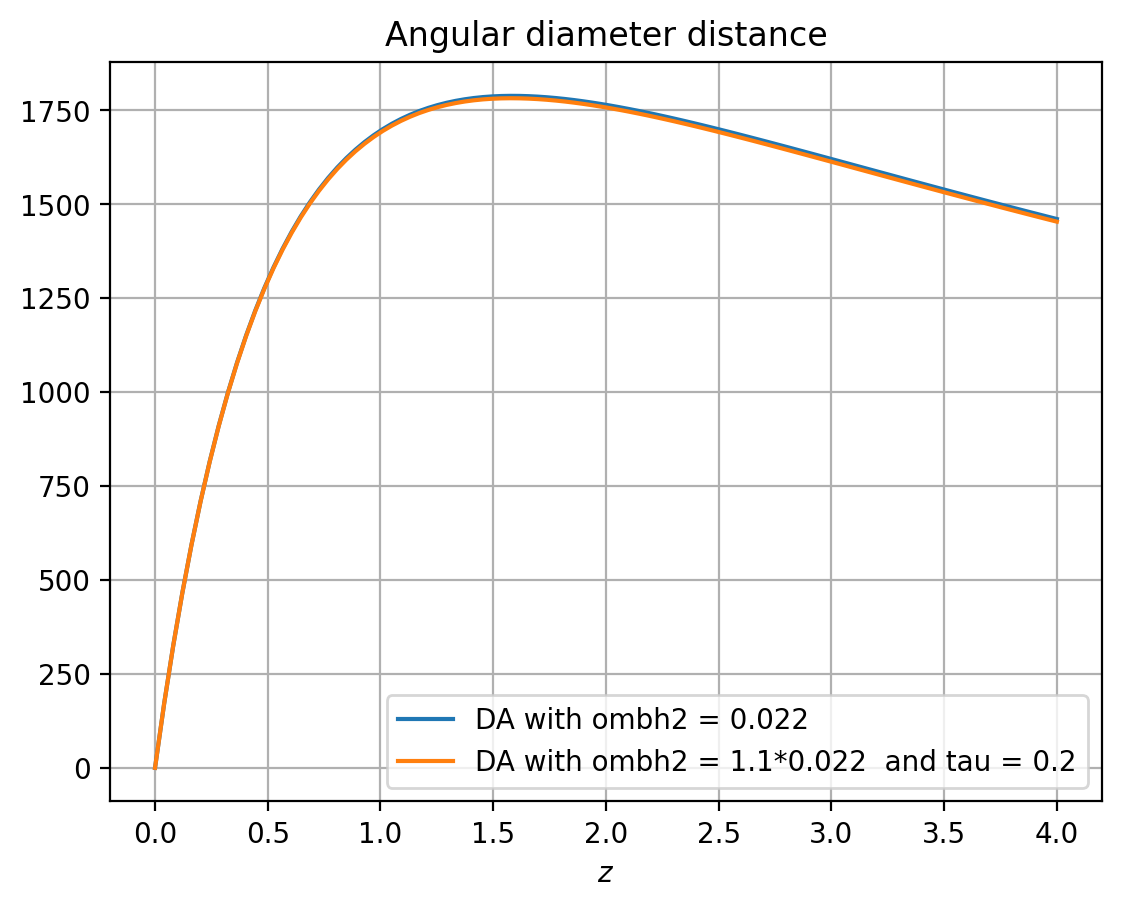

In [4]:
# distances
z = np.linspace(0,4,100)
DA = results.angular_diameter_distance(z)
DA2 = results2.angular_diameter_distance(z)
plt.plot(z, DA, label='DA with ombh2 = 0.022')
plt.plot(z, DA2, label='DA with ombh2 = 1.1*0.022  and tau = 0.2')
plt.plot
plt.xlabel('$z$')
plt.title('Angular diameter distance')
plt.grid(True)
plt.legend()

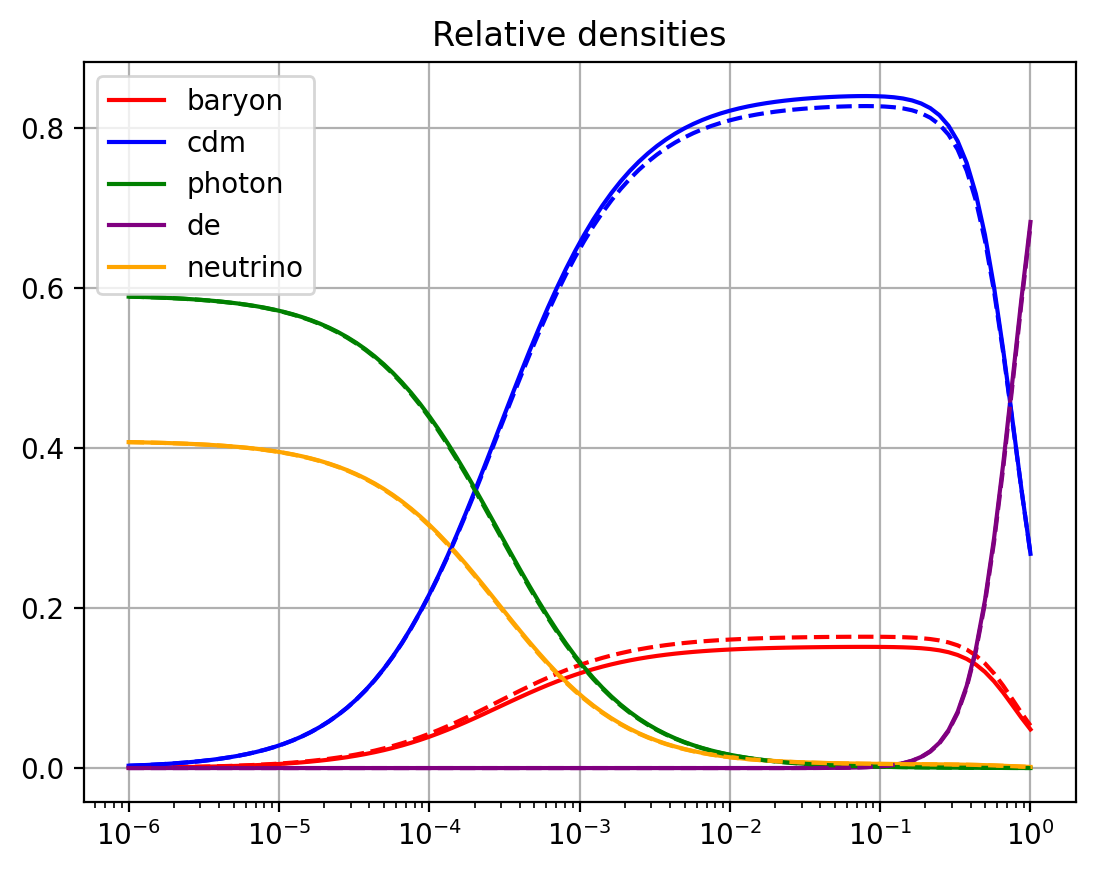

In [5]:
# densities and plot of relative densities
a = np.logspace(-6,0,100)
densities = results.get_background_densities(a)
densities2 = results2.get_background_densities(a)

plt.plot(a, densities['baryon']/densities['tot'], label='baryon', color='red')
plt.plot(a, densities['cdm']/densities['tot'], label='cdm', color='blue')
plt.plot(a, densities['photon']/densities['tot'], label='photon', color='green')
plt.plot(a, densities['de']/densities['tot'], label='de', color='purple')
plt.plot(a, (densities['neutrino']+densities['nu'])/densities['tot'], label='neutrino', color='orange')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.title('Relative densities');

plt.plot(a, densities2['baryon']/densities2['tot'], label='baryon', linestyle='--', color='red')
plt.plot(a, densities2['cdm']/densities2['tot'], label='cdm', linestyle='--', color='blue')
plt.plot(a, densities2['photon']/densities2['tot'], label='photon', linestyle='--', color='green')
plt.plot(a, densities2['de']/densities2['tot'], label='de', linestyle='--', color='purple')
plt.plot(a, (densities2['neutrino']+densities2['nu'])/densities2['tot'], label='neutrino', linestyle='--', color='orange')


## Thermodynamics

In [6]:
# calculation of evolution
a = np.logspace(-6,0,100)
z = 1./a-1
background = results.get_background_redshift_evolution(z)
background2 = results2.get_background_redshift_evolution(z)

In [7]:
# calculation of derived parameters
der = results.get_derived_params()

{'age': 13.740451258557629,
 'zstar': 1090.5875337603734,
 'rstar': 144.20807663323313,
 'thetastar': 1.044624681281135,
 'DAstar': 13.804774022414954,
 'zdrag': 1059.2313735524965,
 'rdrag': 146.9871956034764,
 'kd': 0.14067153789272097,
 'thetad': 0.16177609029391782,
 'zeq': 3441.8515054149993,
 'keq': 0.010503792217322724,
 'thetaeq': 0.8079811516653908,
 'thetarseq': 0.4469751332629092}

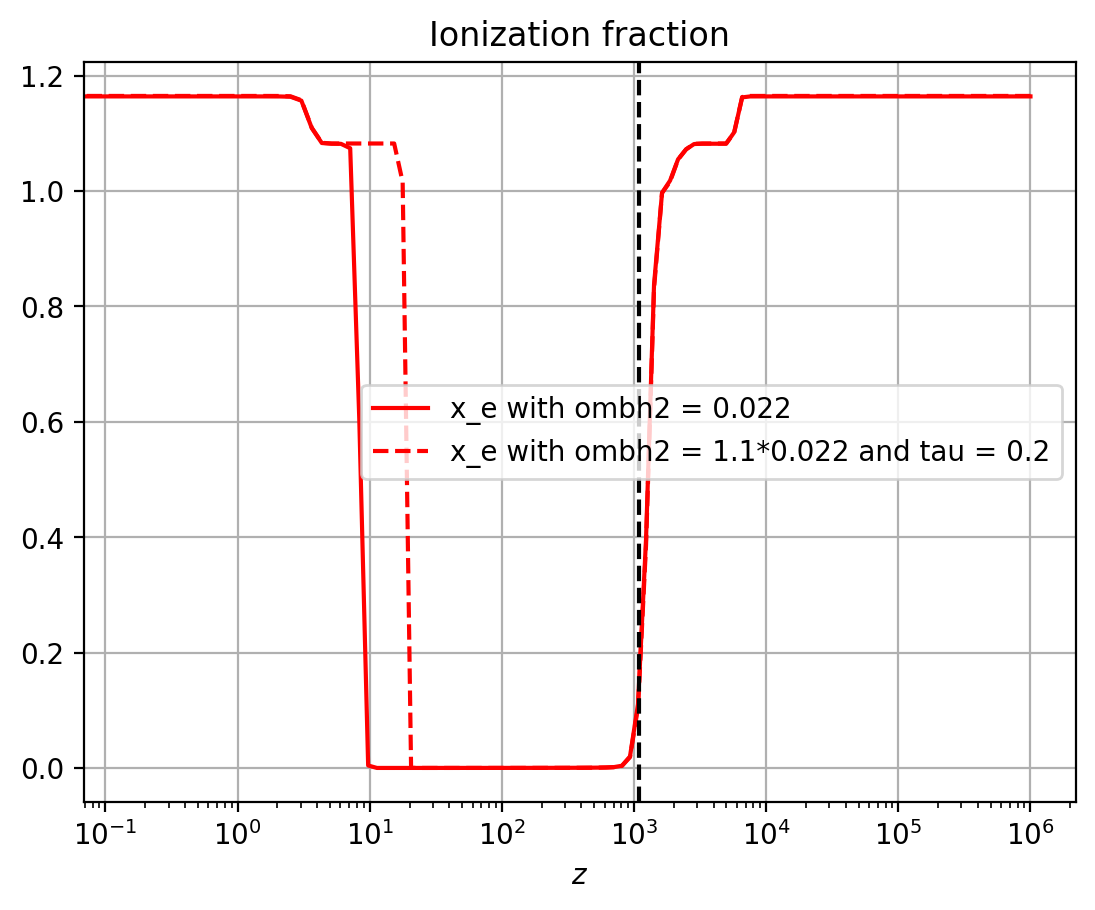

In [8]:
# plot x_e
plt.plot(z, background['x_e'], label='x_e with ombh2 = 0.022', color='red')
plt.plot(z, background2['x_e'], label='x_e with ombh2 = 1.1*0.022 and tau = 0.2', linestyle='--', color='red')
plt.xlabel('$z$')
plt.xscale('log')
plt.title('Ionization fraction')
plt.grid(True)
plt.legend()
plt.axvline(der['zstar'], color='black', linestyle='--')

## Perturbations

In [9]:
a = np.logspace(-6,0,100)
z = 1./a-1
_vars = ['k/h', 'a', 'H', 'delta_cdm', 'delta_photon', 'Weyl' ]
_k = 0.1

ev = results.get_redshift_evolution(_k, z, vars=_vars)


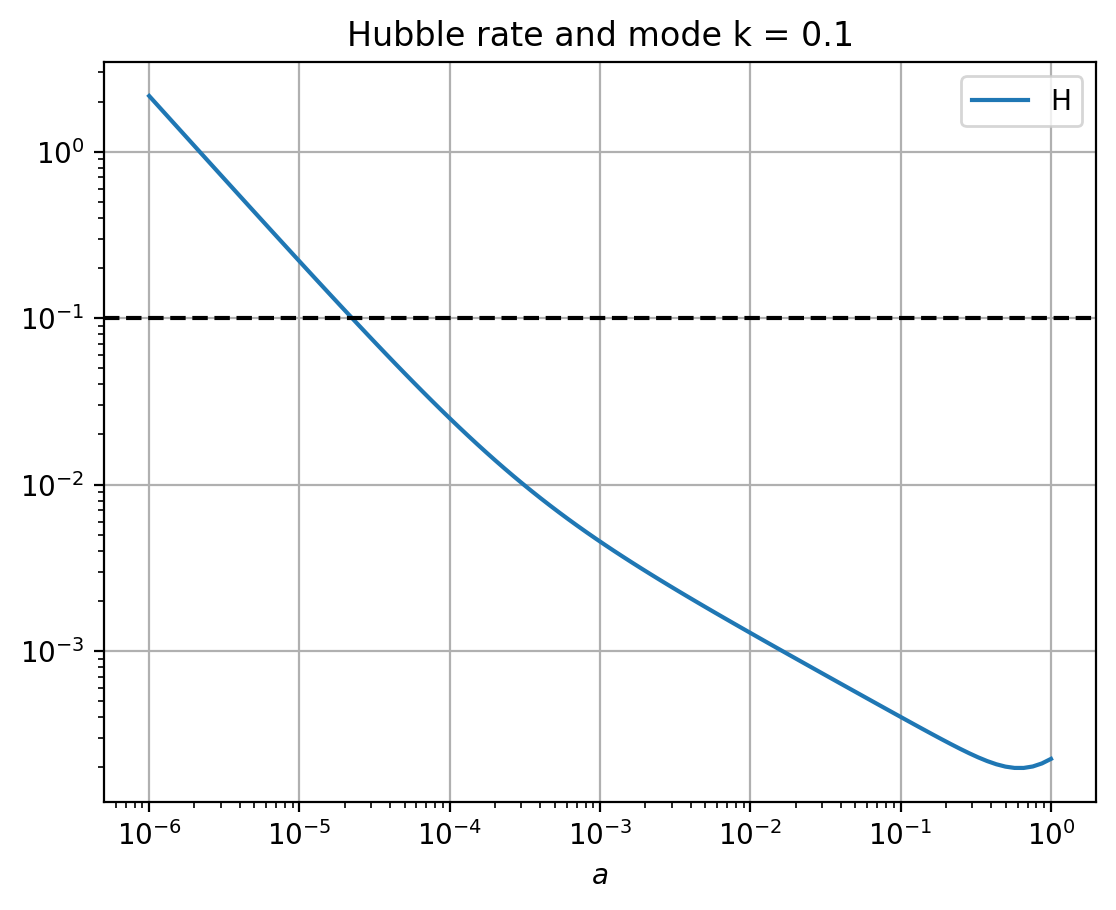

In [10]:
plt.plot(a, ev[:,_vars.index('H')], label='H')
plt.axhline(_k, color='black', linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$a$')
plt.title('Hubble rate and mode k = %s'%_k)
plt.grid(True)
plt.legend()

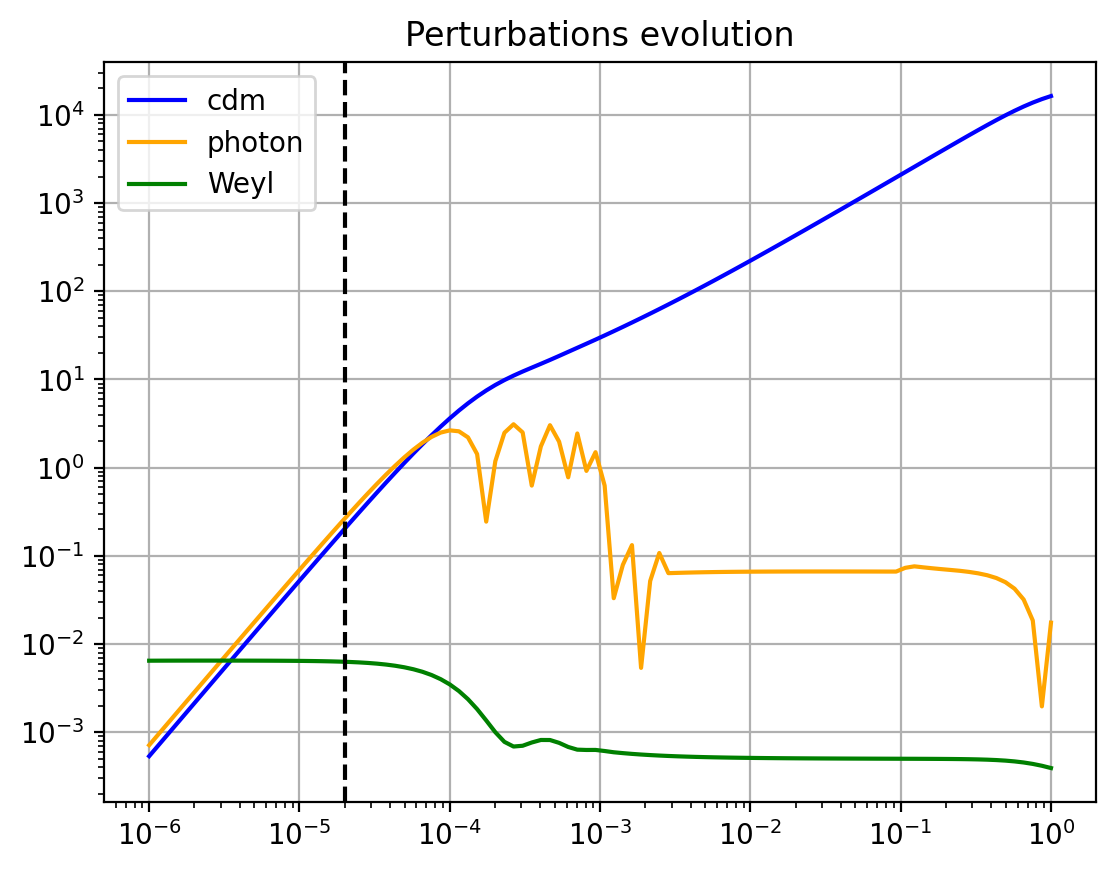

In [11]:
plt.plot(a, np.abs(ev[:,3]), label='cdm', color='blue')
plt.plot(a, np.abs(ev[:,4]), label='photon', color='orange')
plt.plot(a, np.abs(ev[:,5]), label='Weyl', color='green')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('Perturbations evolution')
plt.grid(True)
plt.axvline(2.e-5, color='black', linestyle='--')

## Power spectra